Instructions

Chargez l'ensemble de données dans un bloc de données à l'aide de Python
Nettoyer les données si nécessaire

Créez un graphique en aires pour montrer la tendance des ventes mondiales au fil des ans.

Créez un histogramme pour montrer la répartition des ventes mondiales.

Créez un nuage de points pour montrer la relation entre les ventes en Amérique du Nord et les ventes en Europe.

Créez un nuage de points pour montrer la relation entre les ventes japonaises et les autres ventes.

Créez un graphique en aires empilées pour montrer la répartition des ventes par plateforme au fil des ans.

Créez un graphique à barres pour afficher les 10 principaux éditeurs en termes de ventes mondiales.

Créez un diagramme circulaire pour montrer la répartition des genres par ventes mondiales.

#Answer Questions

##Question1:
Chargons l'ensemble de données dans un bloc de données à l'aide de Python Nettoyons les données si nécessaire

In [ ]:
#Importation des librairies
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

###Chargeons le jeu de données

In [ ]:
#Chargeons les données
df = pd.read_csv('/content/Video games.csv')

In [ ]:
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [ ]:
df.shape

(16598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
#Verifions si on des valeurs manquantes
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Pour la variable year nous avons 271 valeurs manquantes et 58 pour la variable Publisher

###Nettoyons le jeu de données

In [ ]:
#D'abord pour la variable quantitative
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [ ]:
#Pour mieux voir les min et max de la variable year
for var in ["Year"]:
    print('Pour la variable ', var)
    print('Maximum : ', df[var].max())
    print('Minimum : ', df[var].min())

Pour la variable  Year
Maximum :  2020.0
Minimum :  1980.0


<Axes: xlabel='Year'>

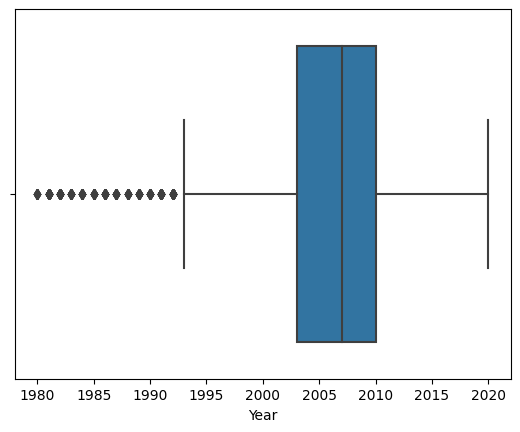

In [ ]:
#Visualisons les valeurs aberrantes
import seaborn as sns
import seaborn as sb
sb.boxplot(x = 'Year', data = df)

In [ ]:
#Pour remplacer nos valeurs manquantes, on utilise l'imputation de la moyenne
df['Year'].fillna(df['Year'].mean(), inplace=True)

In [ ]:
#Pour la variable categorielle Publisher
df.describe(include='O')

Name Platform   Genre        Publisher
count                         16598    16598   16598            16540
unique                        11493       31      12              578
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts
freq                             12     2163    3316             1351

In [ ]:
#Utilisons la fonction d'encodeur d'etiquette  dans la bibliotheque Sklearn pour transformer les variavbles categorielles manquantes
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Publisher']=encoder.fit_transform(df["Publisher"])
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports        359     41.49     29.02      3.77   
1      1985.0      Platform        359     29.08      3.58      6.81   
2      2008.0        Racing        359     15.85     12.88      3.79   
3      2009.0        Sports        359     15.75     11.01      3.28   
4      1996.0  Role-Playing        359     11.27      8.89     10.22   
...       ...           ...        ...       ...       ...       ...   
16593  2002.0      Platform        269      0.01      0.00      0.00   
16594  2003.0       Shooter        241      0.01      0.00      0.00   
16595  2008.0        Racing         21      0.00      0.00      0.00   
16596  2010.0        Puzzle          8      0.00      0.01      0.00   
16597  2003.0      Platform        546      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [ ]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

On voit bien que nous n'avons  de  variables manquantes

##Question2:
Créons  un graphique en aires pour montrer la tendance des ventes mondiales au fil des ans.

In [ ]:
#df = df.set_index("Year").stack().reset_index().rename(columns={"level_1":"Global_Sales" 0:"Value"})

In [ ]:
#df['Value'] = df['Value'].str[:-1]
#df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [ ]:
#df

In [ ]:
#df.loc[df['Value'].isnull(), 'Value'] = df['Value'].mean()

In [ ]:
#df

In [ ]:
fig = px.area(df, x='Year', y=['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales','Global_Sales'], color='Global_Sales')

In [ ]:
fig.show()

##Question3:
Créeons  un histogramme pour montrer la répartition des ventes mondiales.

In [175]:
#create the histogram
fig1 = px.histogram(df, x= 'Year',y='Global_Sales', nbins=15)

In [176]:
fig1.show()

On voit que la vente mondiale des jeux de vidéo est plus important entre 2005 et 2010

##Question4:
Créons un nuage de points pour montrer la relation entre les ventes en Amérique du Nord et les ventes en Europe.

In [180]:
import plotly.graph_objs as go
import plotly.offline as pyo

In [200]:
#Créeons une trace à l'aide de la fonction go.Scatter().
trace = go.Scatter(x=df['NA_Sales'], y=df['EU_Sales'], mode='markers', marker=dict(color=df['Rank']))

In [202]:
#Créeons une liste de données avec l'objet trace
data = [trace]

In [203]:
#Créeons un objet de mise en page à l'aide de la fonction go.Layout()
layout = go.Layout(title='EU_Sales vs. NA_Sales',
                   xaxis=dict(title='EU_Sales'),
                   yaxis=dict(title='NA_Sales'))

In [204]:
#Créeons une figure à l'aide de la fonction go.Figure().
fig = go.Figure(data=data, layout=layout)

In [205]:
fig.show()

##Question5:
Créeons un nuage de points pour montrer la relation entre les ventes japonaises et les autres ventes

In [206]:
trace = go.Scatter(x=df['Other_Sales'], y=df['JP_Sales'], mode='markers', marker=dict(color=df['Rank']))

In [207]:
data = [trace]

In [208]:
layout = go.Layout(title='JP_Sales vs. Other_Sales',
                   xaxis=dict(title='Other_Sales '),
                   yaxis=dict(title='JP_Sales'))

In [209]:
fig3 = go.Figure(data=data, layout=layout)

In [177]:
pyo.plot(fig)

'temp-plot.html'

In [210]:
fig3.show()

##Questions6:
Créeons un graphique en aires empilées pour montrer la répartition des ventes par plateforme au fil des ans.

In [ ]:
dF = pd.DataFrame(df)

In [214]:
fig = px.line(dF, x='Year', y='Platform', title='Repartition des ventes par plateforme au fil des ans')
fig.show()

##Question7:
Créun graphique à barres pour afficher les 10 principaux éditeurs en termes de ventes mondiales.

In [151]:
#Ici prenons le dataset de depart pour voir les principaux editeurs ou publisher
df1=pd.read_csv('/content/Video games.csv')

In [158]:
#Créez un graphique à barres à l'aide de Plotly :

fig = px.bar(df1, x="Global_Sales", y="Publisher" , color="Publisher", height=400)

fig.update_layout(title_text="Principaux editeurs en termes de Global Sales",
                  xaxis_title="Global_Sales", yaxis_title="Publisher")
fig.update_traces(marker=dict(color='blue', opacity=0.7, line=dict(color='blue', width=1.5)))
fig.update_layout(coloraxis_colorbar=dict(title="Publisher"))

On observe que le jeux Microsoft Game Studio est plus vendu, avec une vente global de plus de 1500. Suivi du jeux Majesco Entertainment avec un vente globale de plus de 1000 juste et les autres jeux restants leur vente global oscille entre 0 à 500.

##Question8
Créeons un diagramme circulaire pour montrer la répartition des genres par ventes mondiales.

In [161]:
fig = px.pie(dF, values='Global_Sales', names='Genre', title='Répartitions des genres par ventes mondiales')
fig.update_traces(textposition='inside', textinfo='percent+label')

In [162]:
#Mettez à jour la mise en page pour définir une taille minimale pour le texte et masquer tout texte qui se chevauche.
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')

On remarque que le genre action a la part de repartition plus grand sur la vente mondiale à 19.6%, suivi du type de jeux Sport avec 14.9% des ventes. Les jeux Shooter et Role playing occupent respectivement 11.6% et 10.4% de la repartition de vente mondiale. Le Pourcentage restant des ventes est réparti entre les autres types de jeux. IL est compris entre moins de 10% et moins de 1%.